<a href="https://colab.research.google.com/github/leestorm4520/ArtificialIntelligence_UbiquantMarketPrediction/blob/main/David_SVM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##User Variables

In [108]:
# fileName: Path to file
fileName = "/content/aadr.us.txt"

# category: 'Open', 'High', 'Low', 'Close', 'Volume'
category = 'Close'

# testSize: float between 0.1 and 0.9
testSize = 0.1

#Setup

In [91]:
# IMPORTS

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as mtr

In [92]:
# DATAFRAME CREATION

df = pd.read_csv(fileName, delimiter = ',')

df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-07-21,24.333,24.333,23.946,23.946,43321,0
1,2010-07-22,24.644,24.644,24.362,24.487,18031,0
2,2010-07-23,24.759,24.759,24.314,24.507,8897,0
3,2010-07-26,24.624,24.624,24.449,24.595,19443,0
4,2010-07-27,24.477,24.517,24.431,24.517,8456,0


##Cleaning

In [93]:
df = df.drop(columns=["OpenInt"])
df['Date'] = pd.to_datetime(df.Date,format="%Y-%m-%d")
df = df.set_index('Date')

df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-07-21,24.333,24.333,23.946,23.946,43321
2010-07-22,24.644,24.644,24.362,24.487,18031
2010-07-23,24.759,24.759,24.314,24.507,8897
2010-07-26,24.624,24.624,24.449,24.595,19443
2010-07-27,24.477,24.517,24.431,24.517,8456


#Model

In [94]:
def Model(p):

    # CREATE PREDICTIVE DATAFRAME

    pred_Size = round(testSize * (len(df) - p))

    df_Pred = df[[category]]
    df_Pred['Prediction'] = df_Pred[:-p]

    X = np.array(df_Pred.drop(['Prediction'],axis=1))
    Y = np.array(df[category])

    X, Y = X[:-p], Y[:-p]

    # TRAINING

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=testSize)

    svr = SVR(C=0.1, epsilon=0.2, kernel='linear')

    svr.fit(x_train, y_train)

    forecast = np.array(df_Pred.drop(['Prediction'],axis=1))[-p:]
    svm_prediction = svr.predict(forecast)

    df_Pred.loc[-p:, 'Prediction'] = svm_prediction

    # TEST RESULTS

    y_Pred = df_Pred[-pred_Size:]
    y_Real = df[[category]]
    y_Real = y_Real[-pred_Size:]

    svm_confidence = svr.score(x_test, y_test)
    svm_MSE = mtr.mean_squared_error(np.array(y_Real[category]), np.array(y_Pred['Prediction']))
    svm_RSq = mtr.r2_score(np.array(y_Real[category]), np.array(y_Pred['Prediction']))

    return svm_confidence, svm_MSE, svm_RSq, df_Pred

#Execution

Run this cell after changing User Variables

##Run

This cell holds the messy output, keep closed or clear output for readability.

In [ ]:
if (len(df) >= 30):
    svm_confidence1, svm_MSE1, svm_RSq1, df_Pred1 = Model(30)
    df_Pred1 = df_Pred1[-30:]
    
if (len(df) >= 365):
    svm_confidence2, svm_MSE2, svm_RSq2, df_Pred2 = Model(365)
    df_Pred2 = df_Pred2[-365:]

if (len(df) >= 1095):
    svm_confidence3, svm_MSE3, svm_RSq3, df_Pred3 = Model(1095)
    df_Pred3 = df_Pred3[-1095:]

#Results

Run each cell after running Execution

##Scores

In [110]:
if (len(df) >= 30):
    print("\n30 Close Period Confidence: ", svm_confidence1)
    print("30 Close Period Mean-Squared Error: ", svm_MSE1)
    print("30 Close Period R-Squared Score: ", svm_RSq1)
    
if (len(df) >= 365):
    print("\n365 Close Period Confidence: ", svm_confidence2)
    print("365 Close Period Mean-Squared Error: ", svm_MSE2)
    print("365 Close Period R-Squared Score: ", svm_RSq2)

if (len(df) >= 1095):
    print("\n1095 Close Period Confidence: ", svm_confidence3)
    print("1095 Close Period Mean-Squared Error: ", svm_MSE3)
    print("1095 Close Period R-Squared Score: ", svm_RSq3)


30 Close Period Confidence:  0.9997562006994597
30 Close Period Mean-Squared Error:  0.009359994468928712
30 Close Period R-Squared Score:  0.9994407913608063

365 Close Period Confidence:  0.9993702011540406
365 Close Period Mean-Squared Error:  0.24715555250503043
365 Close Period R-Squared Score:  0.9847725511435614

1095 Close Period Confidence:  0.9957677025940938
1095 Close Period Mean-Squared Error:  2.3773933216997833
1095 Close Period R-Squared Score:  -0.47482928773083155


##Graphs

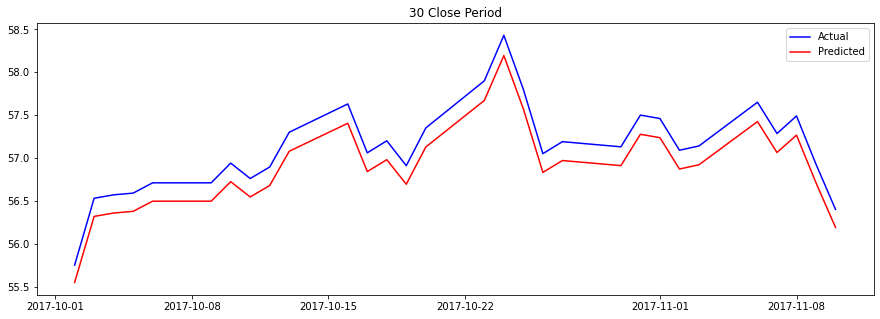

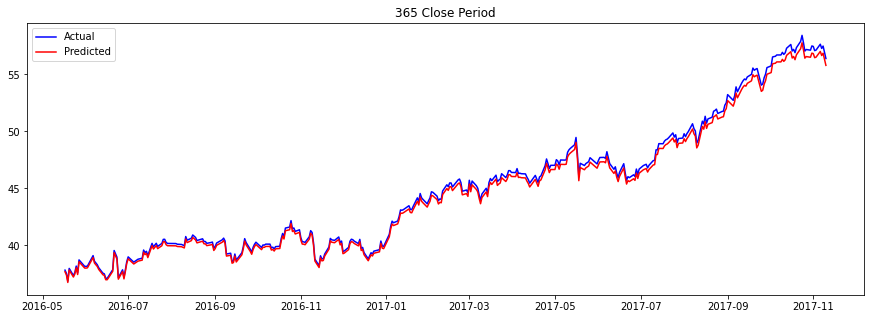

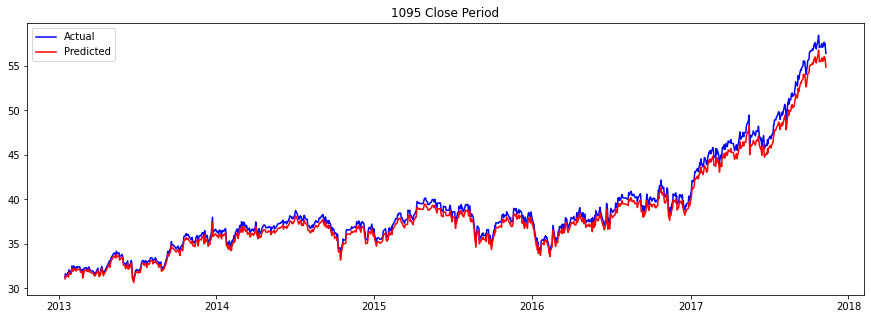

In [111]:
if (len(df) >= 30):
    plt.figure(figsize=(15,5))
    plt.title("30 " + str(category) + " Period")
    plt.plot(df_Pred1[category], color='b', label="Actual")
    plt.plot(df_Pred1['Prediction'], color='r', label="Predicted")
    plt.legend()

if (len(df) >= 365):
    plt.figure(figsize=(15,5))
    plt.title("365 " + str(category) + " Period")
    plt.plot(df_Pred2[category], color='b', label="Actual")
    plt.plot(df_Pred2['Prediction'], color='r', label="Predicted")
    plt.legend()

if (len(df) >= 1095):
    plt.figure(figsize=(15,5))
    plt.title("1095 " + str(category) + " Period")
    plt.plot(df_Pred3[category], color='b', label="Actual")
    plt.plot(df_Pred3['Prediction'], color='r', label="Predicted")
    plt.legend()